# Computeral Assignment 2 - The trebuchet

#### Simone Otelie Solstrand & Stine Bratlie

In [274]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt


In [275]:
'''
initial values
'''
m1 = 2000                                   #mass of counterweight, kg
m2 = 15                                     #mass of the projectile, kg  
l1 = 1.2                                    #Short part of the main beam, m, r_theta
l2 = 5.7                                    #Long part of the main beam, m
l3 = 3.2                                    #stand, m
l4 = 5                                      #projectile sling, m; r_psi
g = 9.81                                    #gravitational acceleration, m/s^2
theta0 = 0.7*np.pi                          #theta at t = 0, rad
thetadot_0 = 0                              #theta_0_dot, rad/s
psi0 = theta0 - 0.5*np.pi                   #psi at t = 0, rad
psidot_0 = 0                                #psi_0_dot at t = 0, rad 
release_angle = 1*np.pi

h = 0.001
t0 = 0
tend = 7

'''

The matrix elements of A
'''
a22 = -l4**2*m2

def a11(psideg): 
    return -l1**2*m1 - l2**2*m2 + 2*l2*l4*m2*np.cos(psideg) - l4**2*m2

def a12(psideg):
    return -l4*m2*(l2*np.cos(psideg)-l4)

def A(psideg):
    a11_1 = a11(psideg)
    a12_1 = a12(psideg)
    Amat = np.array([[a11_1,a12_1],
                [a12_1,a22]])
    return Amat

'''
The matrix b
'''
def b1(theta, w_theta, psi, w_psi):
    
    return g*m1*l1*np.sin(theta) - g*m2*(l2*np.sin(theta)+l4*np.sin(psi-theta))-l2*l4*m2*(w_psi - 2*w_theta)*np.sin(psi)*w_psi

def b2(theta, psi, w_theta):

    return l4*m2*(g*np.sin(psi-theta)-l2*np.sin(psi)*w_theta**2)

def b(thetadeg,thetadot_deg,psideg,psidot_deg):
    b1_element = b1(thetadeg,thetadot_deg,psideg,psidot_deg) 
    b2_element = b2(thetadeg,psideg,thetadot_deg)
    bmat = np.array([b1_element,b2_element])
    
    return bmat


In [276]:
def euler(f, x, y, h):
    y_next = y + f(x,y)*h 
    x_next = x + h
    return x_next, y_next


def RK4(f, eq_val,A,b,h):                               #Runge kutta 4
    k1 = f(eq_val, A,b)                                   #definerer k1, k2, k3 og k4 
    k2 = f(eq_val + h*k1/2,A,b)
    k3 = f(eq_val + h*k2/2,A,b)
    k4 = f(eq_val + h*k3,A,b)

    eq_next = eq_val + (h/6)*(k1 + 2*k2 + 2*k3 + k4)        #Neste verdiene

    return eq_next   

1 . Express the velocities of the projectile and counterweight as functions
of the angles $\psi$, $\theta$ and their time derivatives $\dot{\psi}$ and $\dot{\theta}$. Then, show that the
Lagrangian is given by Eq. (3). Apply the Euler-Lagrange equations for ψ
and θ on the Lagrangian and show that the resulting equations of motion
can be expressed by Eq. (6).


### Expression for the total Lagrangian: 

##### Counterweight:

$$\vec{v}_1 = \begin{bmatrix}  l_1\cos{\theta} \dot{\theta} \\  l_1\sin{\theta} \dot{\theta}  \end{bmatrix}$$

$$\vec{r}_1 = \begin{bmatrix}  l_1\sin{\theta} \\  -l_1\cos{\theta}  \end{bmatrix}$$




Total velocity: $ v_1^2 = l_1^2\dot{\theta}^2$

This gives the kinetic energy;:

$T_1 = \frac{1}{2}m_1l_1^2\dot{\theta}^2$

The potential energy is:

$V_1 = m_1 g y_1 = -m_1 g l_1\cos{\theta}$

The Lagrangian for the counterweight is:

$L_1 = T_1 - V_1 = \frac{1}{2}m_1l_1^2\dot{\theta}^2 - (-m_1 g l_1\cos{\theta})$



##### Projectile:

$$\vec{v}_2 = \begin{bmatrix}  -l_2\cos{\theta}\dot{\theta}-l_4\cos{(\psi-\theta)}(\dot{\psi}-\dot{\theta}) \\  -l_2\sin{\theta}\dot{\theta}+l_4\sin{(\psi-\theta)}(\dot{\psi}-\dot{\theta})  \end{bmatrix}$$



$$\vec{r}_2 = \begin{bmatrix}  -l_2\sin{\theta}-l_4\sin{(\psi-\theta)} \\  l_2\cos{\theta}+l_3-l_4\cos{(\psi-\theta)}(\dot{\psi}-\dot{\theta})  \end{bmatrix}$$

Total velocity: 

$v_2^2 = (-l_2\cos{\theta}\dot{\theta}-l_4\cos{(\psi-\theta)}(\dot{\psi}-\dot{\theta}))^2+(-l_2\sin{\theta}\dot{\theta}+l_4\sin{(\dot{\psi}-\dot{\theta})}(\dot{\psi}-\dot{\theta}))^2$

$= .... = l_2^2\dot{\theta}^2 + l_4^2(\psi-\theta)^2 + 2 l_2 l_4 (\dot{\psi}-\dot{\theta})(\cos{(\psi-\theta)}\cos{\theta}-\sin{(\psi-\theta)}\sin{\theta})$

By using the trigeometrical identity:

$\cos{(a-b)} = \cos{a}\cos{b}+\sin{a}\sin{b}$

and

$\sin{(a-b)} = \sin{a}\cos{b}-\cos{a}\sin{b}$

on the last term. We get:


$v_2^2 = l_2^2\dot{\theta}^2 + l_4^2(\dot{\psi}-\dot{\theta})^2 + 2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})\cos{\psi}$

This will further give the kinetic energy:

$T_2 = \frac{1}{2}m_2v_2^2 = \frac{1}{2}m_2(l_2^2\dot{\theta}^2 + l_4^2(\psi-\theta)^2 + 2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})\cos{\psi})$

The potential energy is:

$V_2 = m_2 g y_2 = m_2 g (l_2\cos{\theta}+l_3-l_4\cos{(\psi-\theta)}(\dot{\psi}-\dot{\theta}))$

And the Lagrangian for the projectile is:

$L_2 = T_2 - V_2 = \frac{1}{2}m_2v_2^2 = \frac{1}{2}m_2(l_2^2\dot{\theta}^2 + l_4^2(\psi-\theta)^2 + 2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})\cos{\psi}) - (m_2 g (l_2\cos{\theta}+l_3-l_4\cos{(\psi-\theta)}(\dot{\psi}-\dot{\theta})))$

##### The total Lagrangian is:

$L_{tot}= L_1 + L_2 $

$= \frac{1}{2}m_1l_1^2\dot{\theta}^2 + m_1 g l_1\cos{\theta} + \frac{1}{2}m_2(l_2^2\dot{\theta}^2 + l_4^2(\psi-\theta)^2 + 2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})\cos{\psi}) - (m_2 g (l_2\cos{\theta}+l_3-l_4\cos{(\psi-\theta)}(\dot{\psi}-\dot{\theta})))$

Tidying up a bit and we get:

$L_{tot}= \frac{1}{2}\dot{\theta}^2(m_1l_1^2+m_2l_2^2)-gl_3(m_1-m_2)+g\cos{\theta}(m_1l_1-m_2l_2)+\frac{1}{2}m_2l_4^2(\dot{\psi}-\dot{\theta})^2 + gm_2\cos{(\psi-\theta)}l_4+m_2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})\cos{\psi}$

as excpected from the given Lagrangian in equation (3) from the problem description.

### Equations of motion
##### Euler - Lagrange equations:

\begin{equation}\tag{1}\frac{\partial L}{\partial \theta} - \frac{d}{dt}(\frac{\partial L}{\partial \dot{\theta}}) = 0\end{equation}

\begin{equation}\tag{2}\frac{\partial L}{\partial \psi} - \frac{d}{dt}(\frac{\partial L}{\partial \dot{\psi}}) = 0\end{equation}

Applying equation (1) on our Lagrangian:

$\frac{\partial L}{\partial \theta} = -g(m_1l_1-m_2l_2)\sin{\theta}+gm_2l_4\sin{(\psi-\theta)}$

$(\frac{\partial L}{\partial \dot{\theta}}) = (m_1l_1^2+m_2l_2^2)\dot{\theta}-m_2l_4^2(\dot{\psi}-\dot{\theta})+m_2l_2l_4(\dot{\psi}-\dot{\theta})\cos{\psi}-m_2l_2l_4\dot{\theta}\cos{\psi}$

$\frac{d}{dt}(\frac{\partial L}{\partial \dot{\theta}}) = (m_1l_1^2+m_2l_2^2) \ddot{\theta} - m_2l_4^2\ddot{\psi} + m_2l_4^2\ddot{\theta} + m_2l_2l_4\ddot{\psi}\cos{\psi}-m_2l_2l_4\dot{\psi}^2\sin{\psi}-m_2l_2l_4\ddot{\theta}\cos{\psi}+m_2l_2l_4\dot{\theta}\sin{\psi}\dot{\psi}-m_2l_2l_4\ddot{\theta}\cos{\psi}+m_2l_2l_4\dot{\theta}\sin{\psi}\dot{\psi}$

Insert and tidy up $\ddot{\theta}$ og $\ddot{\psi}$:


$\frac{\partial L}{\partial \theta} - \frac{d}{dt}(\frac{\partial L}{\partial \dot{\theta}}) = m_2l_2g\sin{\theta}-m_1l_1g\sin{\theta}+gm_2l_4\sin{(\psi-\theta)}$

$-(m_1l_1^2+m_2l_2^2+m_2l_4^2-2m_2l_2l_4\cos{\psi})\ddot{\theta} - (-m_2l_4^2+m_2l_2l_4\cos{\psi})\ddot{\psi} + m_2l_2l_4\dot{\psi}\sin{\psi}-2m_2l_2l_4\dot{\theta}\sin{\psi}\dot{\psi} = 0$

Move parts without $\ddot{\theta}$ and $\ddot{\psi}$ to right side og equation, while parts with $\ddot{\theta}$ and $\ddot{\psi}$ stays on the left side.
Samler og vi får:

RS: 

$gm_1l_1\sin{\theta}-mg(l_2\sin{\theta}+l_4\sin{(\psi-\theta)})-m_2l_2l_4\dot{\psi}\sin{\psi}(\dot{\psi}-2\dot{\theta})$

LS:

$(-m_1l_1^2-m_2l_2^2-m_2l_4^2+2m_2l_2l_4\cos{\psi})\ddot{\theta} - l_4m_2(-l_4+l_2\cos{\psi})\ddot{\psi}$


This agrees with the given expressions for $a_{11}$, $a_{12}$ and $b_1$, where RS gives $a_{11}$ and $a_{12}$, while LS corresponds to $b_1$.






Applying equation (2) to our Lagrangian:

$\frac{\partial L}{\partial \psi} = -m_2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})\sin{\psi} - gm_2l_4\sin{(\psi-\theta)}$

$\frac{\partial L}{\partial \dot{\psi}} = m_2l_4^2(\dot{\psi}-\dot{\theta})+m_2l_2l_4\dot{\theta}\cos{\psi}$

$\frac{d}{dt}(\frac{\partial L}{\partial \dot{\psi}}) = -m_2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})\sin{\psi} - gm_2l_4\sin{(\psi-\theta)}$
$- m_2l_4^2\ddot{\psi}-(-m_2l_4^2+m_2l_2l_4\cos{\psi})\ddot{\theta}+m_2l_2l_4\dot{\theta}\sin{\psi} = 0$

Move parts without $\ddot{\theta}$ and $\ddot{\psi}$ to right side og equation, while parts with $\ddot{\theta}$ and $\ddot{\psi}$ stays on the left side.

RS:

$ = m_2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})\sin{\psi} + gm_2l_4\sin{(\psi-\theta)} - m_2l_2l_4\dot{\theta}\sin{\psi}\dot{\psi} $

One see that the two parts including $\dot{\psi}$ cancels eachother and we get:

$ = l_4m_2(g\sin{(\psi-\theta)}-l_2\dot{\theta}^2\sin{\psi})$

LS:

$= -m_2l_4(l_2\cos{\psi}-l_4)\ddot{\theta}-l_4^2m_2\ddot{\psi}$

This agrees with the given expressions for $a_{22}$, $a_{12}$ and $b_2$, where RS gives $a_{22}$ and $a_{12}$, while LS corresponds to $b_2$.



Writing the two equations on matrix-form, and we achieve the EOM from equation (6).

$$\begin{equation}
\begin{bmatrix} 
a_{11} & a_{12} 
\\ 
a_{12} & a_{22}
\end{bmatrix}
%
\begin{bmatrix} 
\ddot{\theta} 
\\ 
\ddot{\psi} 
\end{bmatrix}
= 
\begin{bmatrix}
b_1 \\ b_2
\end{bmatrix}
\end{equation}$$

with the values of $a_{11}$, $a_{12}$, $a_{22}$, $b_1$ and $b_2$ as given.

In [277]:
def projectile_velocity(theta,psi,theta_dot,psi_dot, L2 = l2, L3 = l3, L4 = l4):
    """ 
    Transforms theta and omega to cartesian coordinates
    and velocities x1, y1, x2, y2, vx1, vy1, vx2, vy2
    x2: position of mass 2 (projectile)
    w: array of from the last iteration
    """
    

    x2 = -L2*np.sin(theta) - L4*np.sin(psi-theta) 
    y2 = L3 + L2*np.cos(theta) - L4*np.cos(psi-theta)

    v2x = -L2*theta_dot*np.cos(theta) - L4*np.cos(psi-theta)*(psi_dot-theta_dot) #PLUSS PÅ SISTE?
    v2y = -L2*theta_dot*np.sin(theta) + L4*np.sin(psi-theta)*(psi_dot-theta_dot)

    return x2,y2,v2x,v2y

In [278]:
def counterweight_velocity(theta,psi,theta_dot,psi_dot, L1=l1,L3=l3):
    '''
    function that expresses the velocity of the counterweight (mass 1)
    '''

    
    x1 = L1 * np.sin(theta)
    y1 = L3 - L1*np.cos(theta)
    v1x = L1*theta_dot * np.cos(theta)
    v1y = theta_dot * L1 * np.sin(theta)

    return x1,y1,v1x,v1y


In [279]:
#Function for trajectory without any airressistance from assignment 1:
def projectile(xi, yi, vx, vy, delta_t):
    '''
    function that expresses the x-, y-position, x- and y- velocity 
    of a projectile after leaving the trebutchet.
    '''
    x_new = xi + vx*delta_t
    vx_new = vx
    y_new = yi + vy*delta_t
    vy_new = vy -g*delta_t

    return x_new,y_new, vx_new, vy_new

2. Use the Runge-Kutta 4th order algorithm to solve the equations of motion given by Eqs. (11) and (12). Use the parameters and initial conditions
 from table 1. Plot θ, ˙θ, ψ, ψ˙ as functions of t for increasingly longer time
intervals T. Are the functions periodic? Plot the trajectory of the projectile without releasing it from the sling for several seconds. Describe the
 motion, is it as expected?

In [280]:
def RHS_trebuchet(w_val,A,b):
    '''
    function that describes the RHS of the EOM for the trebuchet
    #w_val = [ theta psi dtheta dpsi]
    #w = [thetadot, psidot, thetadotdot, psidotdot]
    '''
    A_inverse = np.linalg.inv(A)
    w = np.zeros(4)

    w[0] = w_val[2]                           #I think this is for RK4
    w[1] = w_val[3] 
    w[2:] = np.dot(A_inverse,b)
    return w 

def initialize_wval_trebuchet(theta0,psi0,thetadot_0,psidot_0):
    '''
    function that initializes wval
    wval = [theta  psi  thetadot  psidot]
    '''
    wval = np.zeros(4)
    wval[0] = theta0
    wval[1] = psi0
    wval[2] = thetadot_0
    wval[3] = psidot_0

    return wval

def trebuchet_motion(f,h, theta0,psi0,thetadot0,psidot0, tend, release_angle, angle=False):
    """ 
    Calculates the motion of the trebuchet using the functions
    defined above.
    w = [theta psi thetadot psidot]
    Returns:
        theta_list   array of the trebuchet's theta-values
        psi_list   array of the trebuchet's psi-values
    """
    w = initialize_wval_trebuchet(theta0,psi0,thetadot0,psidot0)
    A_init = A(psi0)
    b_init = b(theta0,thetadot_0,psi0,psidot_0)

    theta_list = np.zeros(0)
    psi_list = np.zeros(0)
    thetadot_list = np.zeros(0)
    psidot_list = np.zeros(0)
    time = np.zeros(1)
    timecheck = True
    if angle == False:
        while  timecheck == True:   #change to w[1] <= releaseangle later 
            Amat = A(w[1])
            bmat = b(w[0],w[2], w[1],w[3])

            w = RK4(f, w, Amat,bmat,h)
            theta_list = np.append(theta_list, w[0])
            psi_list = np.append(psi_list, w[1])
            thetadot_list = np.append(thetadot_list, w[2])
            psidot_list = np.append(psidot_list, w[3])
            
            if time[-1] > tend:
                timecheck = False
            else:
                time = np.append(time, time[-1]+h)
    else:
        while  w[1] > release_angle:   #change to w[1] <= releaseangle later 
            
            Amat = A(w[1])
            bmat = b(w[0],w[2], w[1],w[3])

            w = RK4(f, w, Amat,bmat,h)
            
            theta_list = np.append(theta_list, w[0])
            psi_list = np.append(psi_list, w[1])
            thetadot_list = np.append(thetadot_list, w[2])
            psidot_list = np.append(psidot_list, w[3])
            time = np.append(time, time[-1]+h)
        time=np.delete(time,-1)  
    xp,yp,vxp,vyp = projectile_velocity(theta_list,psi_list,thetadot_list,psidot_list)

    return theta_list, psi_list, thetadot_list, psidot_list, time, xp,yp

In [295]:
thetalist,psilist,thetadot,psidot,t,xp,yp = trebuchet_motion(RHS_trebuchet,h, theta0,psi0,thetadot_0,psidot_0,tend,release_angle,angle=False)

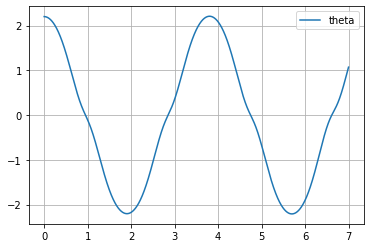

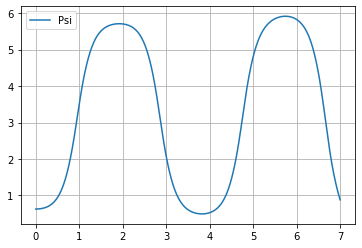

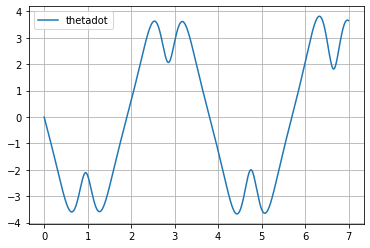

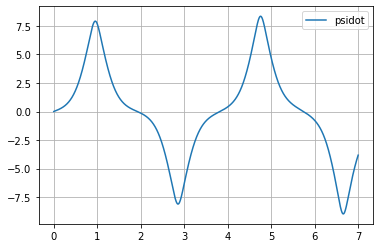

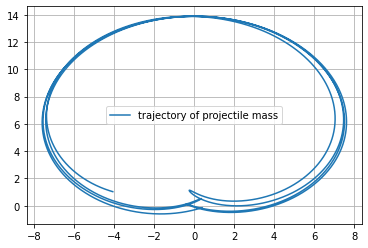

In [282]:
plt.figure(0)
plt.plot(t,thetalist, label='theta')
plt.grid()
plt.legend()
plt.show()


plt.figure(1)
plt.plot(t,psilist, label='Psi')
plt.grid()
plt.legend()
plt.show()


plt.figure(2)
plt.plot(t,thetadot, label='thetadot')
plt.grid()
plt.legend()
plt.show()

plt.figure(3)
plt.plot(t,psidot, label='psidot')
plt.grid()
plt.legend()
plt.show()

plt.figure(4)
plt.plot(xp,yp,label='trajectory of projectile mass')
plt.grid()
plt.legend()
plt.show()

In these plots we see how the different parameters change over seven seconds.

3. Perform the calculation until θ reaches the release angle θr = 0.1π. Then,
use the velocity and firing angle at the moment of release as the initial
 conditions for the equations of motion without air resistance from assignment 1. Calculate several trajectories for different release angles between
 0
◦ and 40◦
. Within what range of release angles θr does the trebuchet fire
 in the forward direction (+ˆx)? Change the initial throwing arm angle to
 θ0 = 0.9π and calculate the trajectories again. Then do the same with the
 \initial sling angle ψ0 = 0. Describe what happens to the trajectories and
 why.

In [283]:
def trajectory_motion(f,h, theta0,psi0,thetadot0,psidot0, tend, release_angle, angle=False):
    """ 
    Calculates the motion of the trebuchet using the functions
    defined above until reached releasing angle.
    Calculated the trajectory of a projectile without any airresisstance after reaching
    the releasing angle.
    
    Returns:
        theta_list:   array of the trebuchet's theta-values
        psi_list:   array of the trebuchet's psi-values
        thetadot_list: array of the velocity of the trebuchet's theta-values
        psidot_list: array of the velocity of the trebuchet's psi-values
        time: time array
        xp: x-values of the trebutchet motion
        yp: y-values of the trebutchet motion
        xp2: total x-values including the trebutchet motion and the trajectory
        yp2: total y-values including the trebutchet motion and the trajectory
        vx_arr: x-values of the velocity of the trajectory
        vy_arr: y-values of the velocity of the trajectory

        
    """
    w = initialize_wval_trebuchet(theta0,psi0,thetadot0,psidot0)
    A_init = A(psi0)
    b_init = b(theta0,thetadot_0,psi0,psidot_0)

    theta_list = np.zeros(0)
    psi_list = np.zeros(0)
    thetadot_list = np.zeros(0)
    psidot_list = np.zeros(0)
    time = np.zeros(1)
    timecheck = True
    if angle == False:
        while  timecheck == True:   #change to w[1] <= releaseangle later #DETTE
            Amat = A(w[1])
            bmat = b(w[0],w[2], w[1],w[3])

            w = RK4(f, w, Amat,bmat,h)
            theta_list = np.append(theta_list, w[0])
            psi_list = np.append(psi_list, w[1])
            thetadot_list = np.append(thetadot_list, w[2])
            psidot_list = np.append(psidot_list, w[3])
            
            if time[-1] > tend:
                timecheck = False
            else:
                time = np.append(time, time[-1]+h)
    
    else:
        while  w[0] > release_angle:   #While the angle theta is larger than the release angle
            
            Amat = A(w[1])
            bmat = b(w[0],w[2], w[1],w[3])

            w = RK4(f, w, Amat,bmat,h)
            
            theta_list = np.append(theta_list, w[0])
            psi_list = np.append(psi_list, w[1])
            thetadot_list = np.append(thetadot_list, w[2])
            psidot_list = np.append(psidot_list, w[3])
            time = np.append(time, time[-1]+h)

        xp,yp,vxp,vyp = projectile_velocity(theta_list,psi_list,thetadot_list,psidot_list) #Gather the arrays from the motion

        vx0 = vxp[-1] #Find initial vx
        vy0 = vyp[-1] #Find initial vy
        v0 = np.sqrt(vx0**2+vy0**2) #Calculate initial value for the trajectory

        x0 = xp[-1] #Find initial x-position for trajectory
        y0 = yp[-1] #Find initial y-position for trajectory

        #Arrays for the trajectory-values:
        x_arr = np.zeros(1)
        x_arr[0] = x0
        y_arr = np.zeros(1)
        y_arr[0] = y0
        vx_arr = np.zeros(1)
        vx_arr[0] = vx0
        vy_arr = np.zeros(1)
        vy_arr[0] = vy0

        while y_arr[-1] > 0: #While the projectile is in the air

            x_val, y_val, vx_val, vy_val = projectile(x_arr[-1], y_arr[-1] , vx_arr[-1], vy_arr[-1], h) #use the function of trajectory with no airresistance

            #Add to arrays:
            x_arr = np.append(x_arr, x_val)
            y_arr = np.append(y_arr, y_val)
            vx_arr = np.append(vx_arr, vx_val)
            vy_arr = np.append(vy_arr, vy_val)

            time = np.append(time, time[-1]+h) #Update time array



        time=np.delete(time,-1)  #Fix time dimentions

        #Combine the motion from trebutchet and trajectory
        xp2 = np.concatenate((xp, x_arr), axis = 0) 
        yp2 = np.concatenate((yp, y_arr), axis = 0)
    

    return theta_list, psi_list, thetadot_list, psidot_list, time, xp,yp, xp2, yp2, vx_arr, vy_arr
    


In [284]:
release_anglelist = [ 0.01*np.pi,0.05*np.pi,0.1*np.pi, 0.15*np.pi, np.radians(40)] #List with release angles

#Calculate:
theta3,psi3,thetadot3,psidot3,t3,xp3,yp3, xp23, yp23, _, _ = trajectory_motion(RHS_trebuchet,h, theta0,psi0,thetadot_0,psidot_0,tend,release_anglelist[0],angle=True)
theta4,psi4,thetadot4,psidot4,t4,xp4,yp4, xp24, yp24, _, _ = trajectory_motion(RHS_trebuchet,h, theta0,psi0,thetadot_0,psidot_0,tend,release_anglelist[1],angle=True)
theta5,psi5,thetadot5,psidot5,t5,xp5,yp5, xp25, yp25, _, _ = trajectory_motion(RHS_trebuchet,h, theta0,psi0,thetadot_0,psidot_0,tend,release_anglelist[2],angle=True)
theta6,psi6,thetadot6,psidot6,t6,xp6,yp6, xp26, yp26, _, _ = trajectory_motion(RHS_trebuchet,h, theta0,psi0,thetadot_0,psidot_0,tend,release_anglelist[3],angle=True)
theta7,psi7,thetadot7,psidot7,t5,xp7,yp7, xp27, yp27, _, _ = trajectory_motion(RHS_trebuchet,h, theta0,psi0,thetadot_0,psidot_0,tend,release_anglelist[4],angle=True)


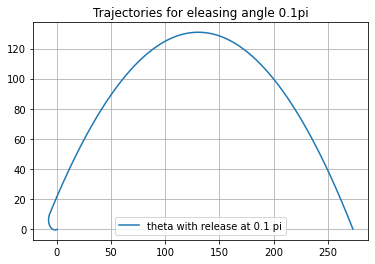

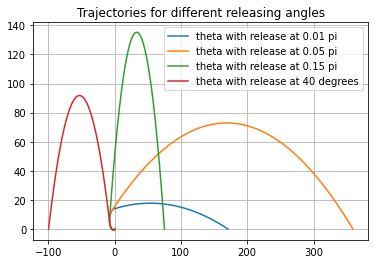

In [297]:
#Plots the motion for different release angles:

plt.figure(8)
plt.title("Trajectories for eleasing angle 0.1pi")
plt.plot(xp25,yp25, label='theta with release at 0.1 pi')
plt.grid()
plt.legend()
plt.show()

plt.figure(8)
plt.title("Trajectories for different releasing angles")
plt.plot(xp23,yp23, label='theta with release at 0.01 pi')
plt.plot(xp24,yp24, label='theta with release at 0.05 pi')
plt.plot(xp26,yp26, label='theta with release at 0.15 pi')
plt.plot(xp27,yp27, label='theta with release at 40 degrees')
plt.grid()
plt.legend()
plt.show()


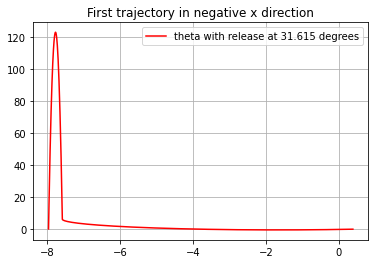

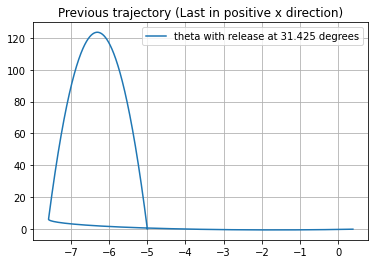

In [286]:
 #Defines releaseangle list with angles close to the point where the trajectory is in negative x-direction

release_anglelist2 = np.linspace(np.radians(30) ,np.radians(35),100)


for i in release_anglelist2: #Iterate through the list

    theta,psi,thetadot,psidot,t,xp,yp, xp2, yp2, v_arr; _ = trajectory_motion(RHS_trebuchet,h, theta0,psi0,thetadot_0,psidot_0,tend,i,angle=True)
    
    
    if v_arr[0] > 0: #Saves the previous values if the motion is in positive x-direction
        theta_old = theta
        xp2_old = xp2
        yp2_old = yp2
        
    elif v_arr[0] < 0: #Find the angle that gives motion in negative x-direction
        
        theta_crit = theta[-1]
        
        #Plot the trajectories:
        plt.figure(9)
        plt.title("First trajectory in negative x direction")
        plt.plot(xp2,yp2, color = "r", label=f'theta with release at {round(np.degrees(theta[-1]), 3)} degrees')
        plt.grid()
        plt.legend()
        plt.show()
        
        
        
        plt.figure(10)
        plt.title("Previous trajectory (Last in positive x direction)")
        plt.plot(xp2_old,yp2_old, label=f'theta with release at {round(np.degrees(theta_old[-1]), 3)} degrees')
        plt.grid()
        plt.legend()
        plt.show()
        
        
        break

    
        

From a release angle of 31.425 degrees, we get a trajectory in the positive x-direction.

In [298]:
theta02 = 0.9*np.pi #Change the initial theta value

release_anglelist = [ 0.01*np.pi,0.05*np.pi,0.1*np.pi, 0.15*np.pi, np.radians(40)]

#Calculate the trajectory for same release list as before
theta8, _, _, _,t8,xp8,yp8, xp28, yp28, _, _ = trajectory_motion(RHS_trebuchet,h, theta02,psi0,thetadot_0,psidot_0,tend,release_anglelist[0],angle=True)
theta9, _, _, _,t9,xp9,yp9, xp29, yp29, _, _ = trajectory_motion(RHS_trebuchet,h, theta02,psi0,thetadot_0,psidot_0,tend,release_anglelist[1],angle=True)
theta10, _, _, _,t10,xp10,yp10, xp210, yp210, _, _ = trajectory_motion(RHS_trebuchet,h, theta02,psi0,thetadot_0,psidot_0,tend,release_anglelist[2],angle=True)
theta11, _, _,_,t11,xp6,yp11, xp211, yp211, _, _ = trajectory_motion(RHS_trebuchet,h, theta02,psi0,thetadot_0,psidot_0,tend,release_anglelist[3],angle=True)
theta12, _, _,_,t12,xp12,yp12, xp212, yp212, _, _ = trajectory_motion(RHS_trebuchet,h, theta02,psi0,thetadot_0,psidot_0,tend,release_anglelist[4],angle=True)



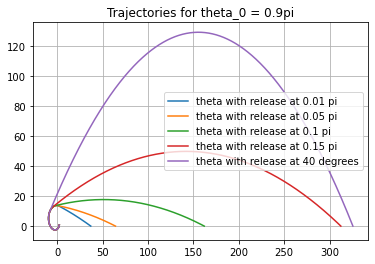

In [299]:
#Plot the graphs:
plt.figure(11)
plt.title("Trajectories for theta_0 = 0.9pi")
plt.plot(xp28,yp28, label='theta with release at 0.01 pi')
plt.plot(xp29,yp29, label='theta with release at 0.05 pi')
plt.plot(xp210,yp210, label='theta with release at 0.1 pi')
plt.plot(xp211,yp211, label='theta with release at 0.15 pi')
plt.plot(xp212,yp212, label='theta with release at 40 degrees')
plt.grid()
plt.legend()
plt.show()

In [300]:
psi02 = 0 #Change the initial psi-value to zero

release_anglelist = [ 0.01*np.pi,0.05*np.pi,0.1*np.pi, 0.15*np.pi, np.radians(40)]

#Calculate the trajectory for same release list as before
_, _, _, _, t13, _, _, xp213, yp213, _, _ = trajectory_motion(RHS_trebuchet,h, theta0,psi02,thetadot_0,psidot_0,tend,release_anglelist[0],angle=True)
_, _, _, _, t14, _, _, xp214, yp214, _, _ = trajectory_motion(RHS_trebuchet,h, theta0,psi02,thetadot_0,psidot_0,tend,release_anglelist[1],angle=True)
_, _, _, _,t10, _, _, xp215, yp215, _, _ = trajectory_motion(RHS_trebuchet,h, theta0,psi02,thetadot_0,psidot_0,tend,release_anglelist[2],angle=True)
_, _, _, _,t11, _, _, xp216, yp216, _, _ = trajectory_motion(RHS_trebuchet,h, theta0,psi02,thetadot_0,psidot_0,tend,release_anglelist[3],angle=True)
_, _, _, _,t12, _, _, xp217, yp217, _, _ = trajectory_motion(RHS_trebuchet,h, theta0,psi02,thetadot_0,psidot_0,tend,release_anglelist[4],angle=True)



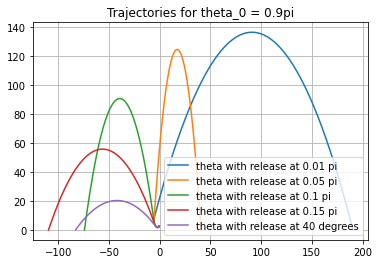

In [301]:
#Plot the graphs:
plt.figure(12)
plt.title("Trajectories for theta_0 = 0.9pi")
plt.plot(xp213,yp213, label='theta with release at 0.01 pi')
plt.plot(xp214,yp214, label='theta with release at 0.05 pi')
plt.plot(xp215,yp215, label='theta with release at 0.1 pi')
plt.plot(xp216,yp216, label='theta with release at 0.15 pi')
plt.plot(xp217,yp217, label='theta with release at 40 degrees')
plt.grid()
plt.legend()
plt.show()

We see that for the initial angle $\theta_0$ = $0.9\pi$ all the trajectories is in the positive x-direction. For the initial angle $\psi_0 = 0$ it is required a lower release angle $\theta_r$ for the trajectory to be in the negative x-direction. 

This is because a larger initial $\theta_0$ gives the counterweight a longer path for acceleration, which will contribute to a larger velocity for the projectile in the positive x-direction. Hence a larger release angle is needed for a trajectory in the negative x-direction. The same way will $\psi_0 = 0$ contribute to a velocity in the negative x-direction and the angle needed to get a negative trajectory is smaller.

In [291]:
def range_impact(release_anglelist):
    '''
    function that calculates the angle that gives longest range
    and largest impact from a list of release angles.
    Returns:
    E_max: Max impact
    rangle_max: max range
    i_E: position index of E_max
    i_r: position index of r_max
    '''
    
    E_max = 0
    i_E = 0
    range_max = 0
    i_r = 0
    
    #Iterate through list of angles
    for i in range(len(release_anglelist)):
        _, _, _, _,t, _, _, xp2, yp2, vx, vy = trajectory_motion(RHS_trebuchet,h, theta0, psi0, thetadot_0, psidot_0, tend, release_anglelist[i],angle=True)
        
        v = np.sqrt(vx[-1]**2 + vy[-1]**2) #Calculate velocity
        
        E = 0.5*m2*v**2 #Calculate the energy
        
         x = xp2[-1] #Find max range in x-direction
        
        
        #Updates the values and position index
        if E > E_max: 
            E_max = E
            i_E = i
        
        if x > range_max:
            range_max = x
            i_r = i
            
            
    return  E_max, range_max, i_E, i_r
        
        
        
        

In [292]:
release_anglelist_range_E = np.linspace(np.radians(32), 0, 100) #Make array with release angles


E_max, range_max, i_E, i_r = range_impact(release_anglelist_range_E) #Calculate

theta_E = round(np.degrees(release_anglelist_range_E[i_E]),3)

theta_r = round(np.degrees(release_anglelist_range_E[i_r]),3)

print(round(E_max, 3), "N is the largest impact, and we get that from a releasing angle of", theta_E, "degrees.")
print("\n")
print(round(range_max, 3), "m is the largest range, and we get that from a releasing angle of", theta_r, "degrees.")


31003.756 N is the largest impact, and we get that from a releasing angle of 0.0 degrees.


365.009 m is the largest range, and we get that from a releasing angle of 10.667 degrees.


In [293]:
#Calculate trajectories with largest impact and range

_, _, _, _, _, _, _, xp_max_E, yp_max_E, vx_max_E, vy_max_E = trajectory_motion(RHS_trebuchet,h, theta0, psi0, thetadot_0, psidot_0, tend, release_anglelist_range_E[i_E],angle=True)
_, _, _, _, _, _, _, xp_max_r, yp_max_r, vx_max_r, vy_max_r = trajectory_motion(RHS_trebuchet,h, theta0, psi0, thetadot_0, psidot_0, tend, release_anglelist_range_E[i_r],angle=True)



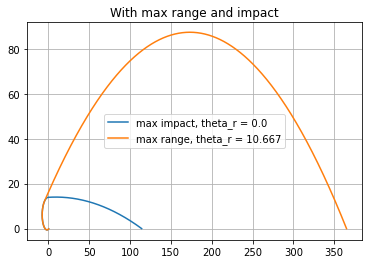

In [294]:
#Plots our graphs
plt.figure(12)
plt.title("With max range and impact")
plt.plot(xp_max_E,yp_max_E, label=f'max impact, theta_r = {theta_E}')
plt.plot(xp_max_r,yp_max_r, label=f'max range, theta_r = {theta_r}')
plt.grid()
plt.legend()
plt.show()

The different graphs vary as the maximum values are dependent on different values. E_max is dependent on $\vec{v}$, while r_max is dependent of $x$. Since the expressions for calculating the velocity and position are different both in the trebutchet motion and the trajectory, it makes sense that the values release angles and hence the trajectories are different.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b032d64f-c49a-4173-b7c2-7808aa986e3b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>